# The Final Project: A Descriptive Story Telling
<h4> Presented By: Allan Carlo T. Ramos </h4>
<h4> Submitted to: Francis Adrian Viernes </h4>

Data Source: <a href="https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset"> Kaggle Analytics </a> 

What are the Contents of the Data:
<ol type="1">
  <li>Age: Numeric - Discrete</li>
  <li>Attrition: Yes/No</li>
  <li>BusinessTravel: Non-Travel, Travel_Frequently, Travel_Rarely</li>
  <li>DailyRate: Numeric - Discrete </li>
    <li>Department: Research &#38 Sales, Research &#38 Development, Human Resources</li>
  <li>DistanceFromHome:Numeric</li>
<li>Education: 1 'Below College', 
2 'College',
3 'Bachelor',
4 'Master',
5 'Doctor'</li>
<li>EducationField: Life Sciences,
Other,
Medical,
Marketing,
Technical Degree
Human Resources</li>
<li>EmployeeCount:Numeric Discrete</li>
<li>EmployeeNumber:Numeric Discrete</li>
<li>EnvironmentSatisfaction:1 'Low'
2 'Medium'
3 'High'
4 'Very High'</li>
<li>Gender:Male, Female</li>
<li>HourlyRate:Numeric Continouos</li>
<li>JobInvolvement:1 'Low'
2 'Medium'
3 'High'
4 'Very High'</li>
<li>JobLevel:1-5, Discrete</li>
<li>JobRole:Sales Executive
Research Scientist
Laboratory Technician
Manufacturing Director
Healthcare Representative
Manager
Sales Representative
Research Director
Human Resources</li>
<li>JobSatisfaction:1 'Low'
2 'Medium'
3 'High'
4 'Very High'</li>
<li>MaritalStatus:Single, Married, Divorced</li>
<li>MonthlyIncome:Numeric</li>
<li>MonthlyRate:Numeric</li>
<li>NumCompaniesWorked:Numeric Discrete</li>
<li>Over18:Yes - Y, No - N</li>
<li>OverTime:Does Overtime: Yes, No</li>
<li>PercentSalaryHike:Numeric</li>
<li>PerformanceRating:1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'</li>
<li>RelationshipSatisfaction:1 'Low'
2 'Medium'
3 'High'
4 'Very High'</li>
<li>StandardHours:Numeric Discete</li>
<li>StockOptionLevel:0,1,2,3</li>
<li>TotalWorkingYears:Numeric Discrete</li>
<li>TrainingTimesLastYear:Numeric Discrete</li>
<li>WorkLifeBalance:1 'Bad'
2 'Good'
3 'Better'
4 'Best'</li>
<li>YearsAtCompany:Numeric Discrete</li>
<li>YearsInCurrentRole:Numeric Discrete</li>
<li>YearsSinceLastPromotion:Numeric Discrete</li>
<li>YearsWithCurrManager:Numeric Discrete</li>
 
</ol>  


<h2> <b>Import Tools and Packages Here</b> </h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h4> Global Variables </h4>

In [2]:
employee_info_ds = pd.read_csv('AttritionInIBM.xls')

### Number of Male and Female who resigned and who stayed 
<p> This shows that more male have resigned from the company </p>
<p> More males also stayed in the company </p> 

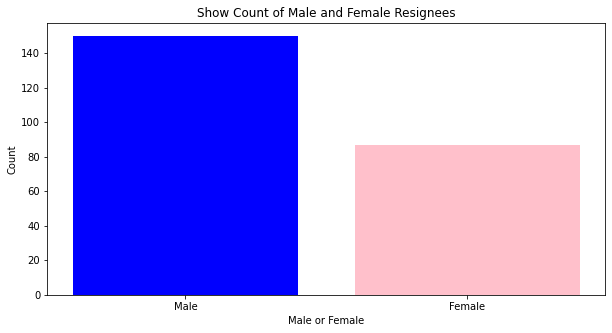

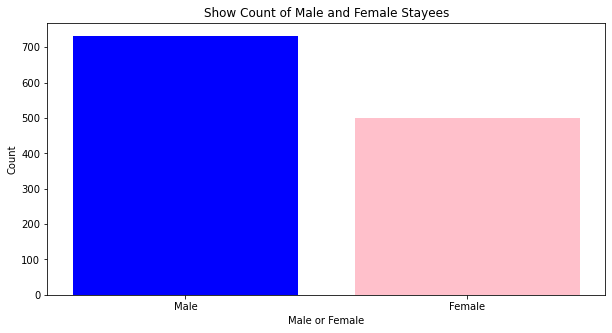

In [3]:
def showGraphForMaleAndFemale(attrition_yes_no):
    '''
        showGraphFOrMaleAndFemale - Shows graphs of those who have resigned and not resiged breakdowned by male/female
        ----
        Param: 
        attrition_yes_no - String - 'Yes' or 'No'
    '''

    temp_pd = employee_info_ds[['Gender']][employee_info_ds['Attrition']==attrition_yes_no]
    gender_summary_dict = {
    'Male': None,
    'Female':None
    }

    gender_summary_dict['Male'] = int(temp_pd[temp_pd['Gender']=='Male'].count())
    gender_summary_dict['Female'] = int(temp_pd[temp_pd['Gender']=='Female'].count())

    gender_x = list() 
    count_y = list()
    for key,value in gender_summary_dict.items():
        gender_x.append(key)
        count_y.append(value)
    colors = ['blue', 'pink']
    fig = plt.figure(figsize=(10,5))
    plt.bar(gender_x, count_y, color=colors)
    plt.xlabel("Male or Female")
    plt.ylabel("Count")
    if (attrition_yes_no == 'Yes'):
        plt.title("Show Count of Male and Female Resignees")
    else:
        plt.title("Show Count of Male and Female Stayees")
    plt.show()
    
showGraphForMaleAndFemale('Yes')
showGraphForMaleAndFemale('No')


<h4>Which age could people be resigning?</h4>

<p> Based on the graph below, between ages approximately 15 to 35, there is an upward trend of attrition in age. However, attrition decreases after the age of 35 <p> 

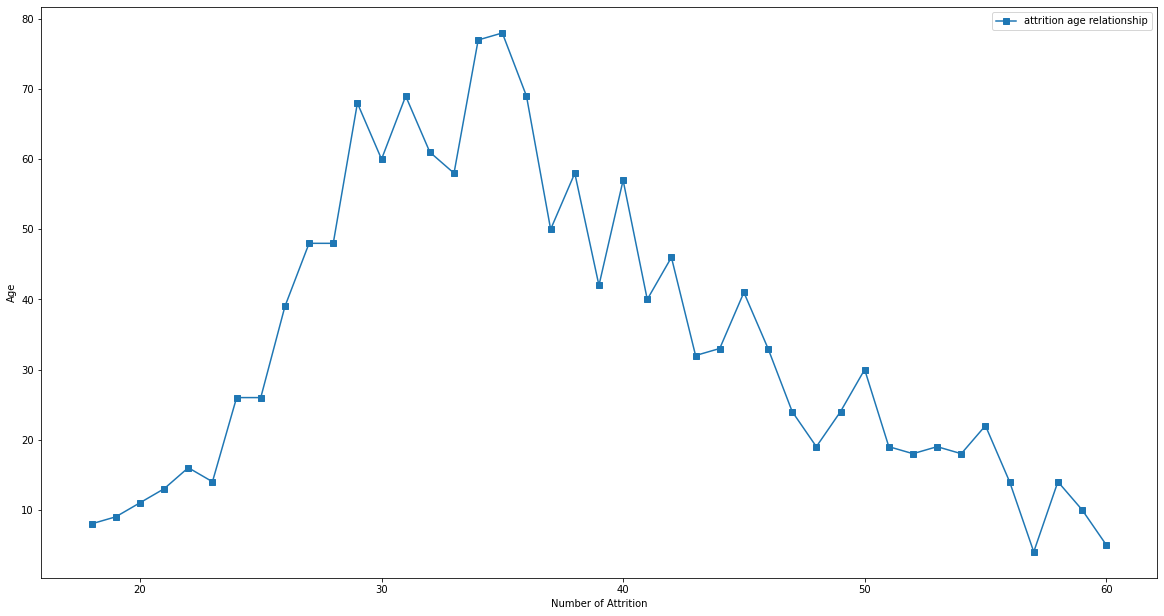

In [4]:
temp_pd = employee_info_ds.groupby('Age').count()['Attrition']
ages_axis_x = temp_pd.index.tolist()
number_of_attrition_y = temp_pd.tolist()
plt.rcParams["figure.figsize"] = [20.00, 10.50]
fig = plt.figure()
ax = plt.axes()
ax.plot(ages_axis_x, number_of_attrition_y, "-s", label="attrition age relationship")
x_axis_labels_range = list(range(0,100,10))
plt.xlabel("Number of Attrition")
plt.ylabel("Age")
plt.legend()
plt.show()

<h4> Monthtly Income of People </h4>
<p> Find out the monthly income of those who resign. Let us see if there is a pattern </p>

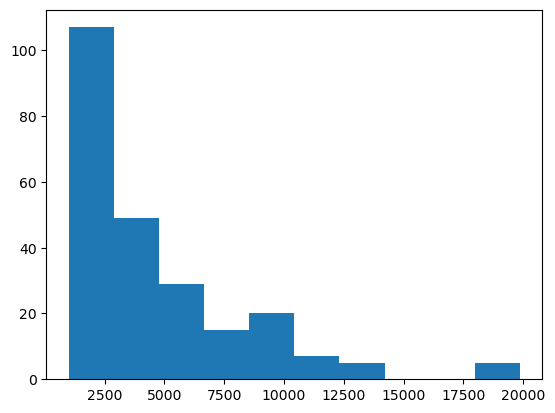

In [5]:
temp_ds = employee_info_ds[['MonthlyIncome']][employee_info_ds['Attrition']=='Yes']
plt.style.use('default')
x_axis = temp_ds["MonthlyIncome"]
plt.hist(x_axis)
plt.show()

<p> Ah there is a pattern. The histogram is skewed to the left. This means that lower income of less than 6000 have resigned. I think for this one I need to know what other factors on people with low income (less than 6000 / month) that would affect their resigniation </p>

<h4> What is the work life balance of these people who have less than 6000 monthly</h4>

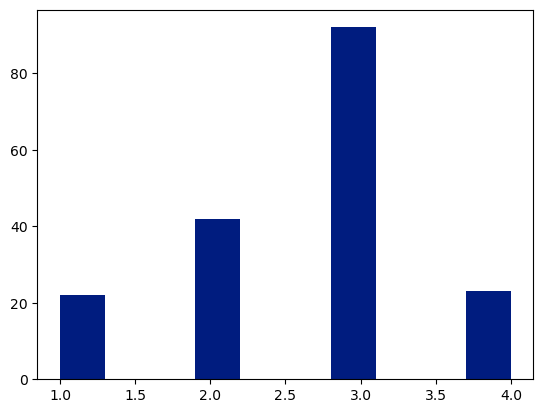

In [6]:
temp_ds = employee_info_ds[['MonthlyIncome','WorkLifeBalance']][employee_info_ds['Attrition']=='Yes']
people_with_less_than_6000_monthly = temp_ds['WorkLifeBalance'][temp_ds['MonthlyIncome'] < 6000]
plt.style.use('seaborn-dark-palette')
x_axis = people_with_less_than_6000_monthly
plt.hist(x_axis)
plt.show()

<p> Based on the Data those with 3.0 Level of Worklife balance has the most number of resignees </p>

<h4>What about their tenure in work</h4>

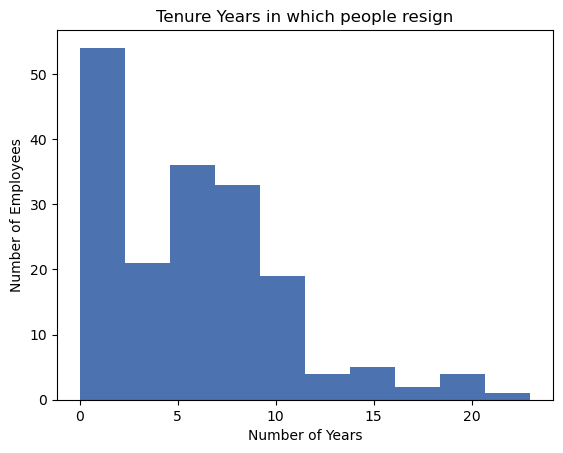

In [7]:
temp_ds = employee_info_ds[['MonthlyIncome','TotalWorkingYears']][employee_info_ds['Attrition']=='Yes']
people_with_tenure = temp_ds['TotalWorkingYears'][temp_ds['MonthlyIncome'] < 6000]
plt.style.use('seaborn-deep')
x_axis = people_with_tenure
plt.xlabel("Number of Years")
plt.ylabel("Number of Employees")
plt.title("Tenure Years in which people resign")
plt.hist(x_axis)
plt.show()

<p> Between 0 to 10 years of tenure, people resign. It shows that histogram is skewed to the left</p>

<h4> Ages of people with lower than 6000 monthly </h4>

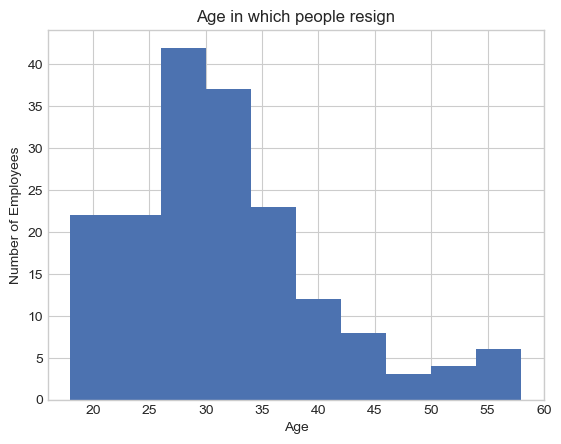

In [8]:
temp_ds = employee_info_ds[['MonthlyIncome','Age']][employee_info_ds['Attrition']=='Yes']
people_with_age = temp_ds['Age'][temp_ds['MonthlyIncome'] < 6000]
plt.style.use('seaborn-whitegrid')
x_axis = people_with_age
plt.xlabel("Age")
plt.ylabel("Number of Employees")
plt.title("Age in which people resign")
plt.hist(x_axis)
plt.show()

<p> Ages 20 to 25 has a medium rate of resignation while those who are in 30's resigns. As the age gets lower until 50's the resignation drops but it slightly increases after the age of 55</p>

<h4> What about the relationship satisfaction of those people with less than 6000? </h4>

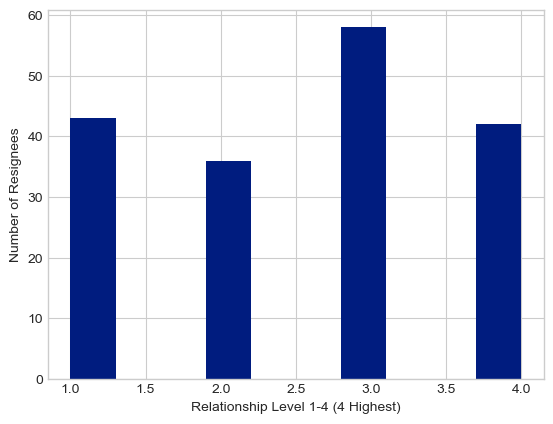

In [9]:
temp_ds = employee_info_ds[['MonthlyIncome','RelationshipSatisfaction']][employee_info_ds['Attrition']=='Yes']
people_with_relationship_satisfaction = temp_ds['RelationshipSatisfaction'][temp_ds['MonthlyIncome'] < 6000]
plt.style.use('seaborn-dark-palette')
x_axis = people_with_relationship_satisfaction
plt.hist(x_axis)
plt.xlabel("Relationship Level 1-4 (4 Highest)")
plt.ylabel("Number of Resignees")
plt.show()

<p> No Pattern here </p>

<h4> Years since Last Promotion for those with less than 6000 / month and resignees </h4>

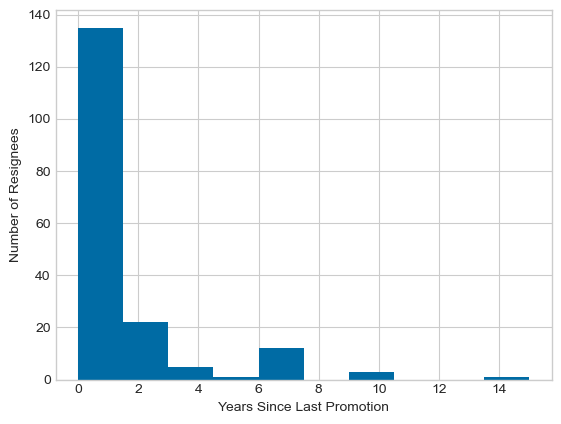

In [10]:
temp_ds = employee_info_ds[['MonthlyIncome','YearsSinceLastPromotion']][employee_info_ds['Attrition']=='Yes']
people_years_since_promotion = temp_ds['YearsSinceLastPromotion'][temp_ds['MonthlyIncome'] < 6000]
plt.style.use('tableau-colorblind10')
x_axis = people_years_since_promotion
plt.hist(x_axis)
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Number of Resignees")
plt.show()

<p> Those who got promoted recently are the ones resigning </p>

<h4> What about thier job satisfaction? </h4>

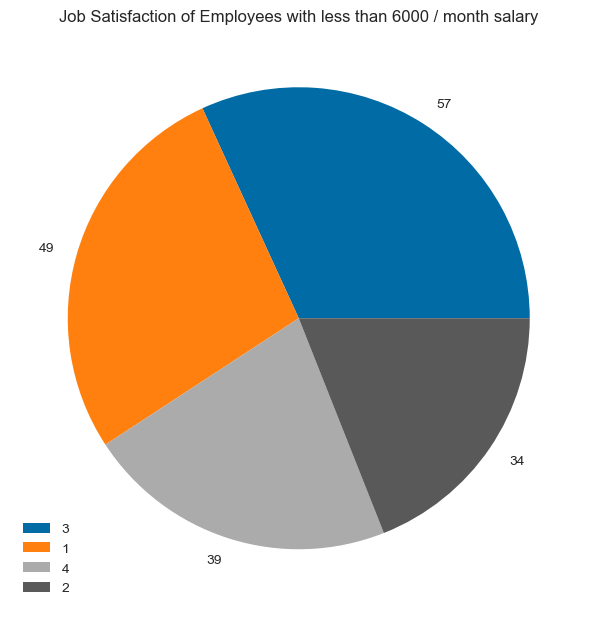

In [11]:
temp_ds = employee_info_ds[['MonthlyIncome','JobSatisfaction']][employee_info_ds['Attrition']=='Yes']
temp_ds = temp_ds['JobSatisfaction'][temp_ds['MonthlyIncome'] < 6000]
plt.style.use('seaborn-ticks')
plt.rcParams["figure.figsize"] = [15, 7.50]
categories_value = temp_ds.value_counts()
my_labels = categories_value.index.to_list()
pactches, text = plt.pie(categories_value, labels=categories_value)
plt.title("Job Satisfaction of Employees with less than 6000 / month salary")
plt.legend(pactches, my_labels, loc="best")
plt.show()

<p> Those with a Level 3 Job Satisfaction are the ones who resigned the most. Second, are the ones with level 1. Third, are those with level 4. Lastly, those with level 2 </p>

<h1> Findings / Analysis / Insights </h1>

<ul>
    <li>it is worth noting that those who resign are those with less than 6000 monthly </li> 
    <ul>
    <li> Ages 20 to 25 has a medium rate of resignation while those who are in 30's aggressively resigns. As the age gets lower until 50's the resignation drops but it slightly increases after the age of 55</li>
     <li> Based on the data on relationship satisfaction graphs does not give any indication that they affect resignation </li>
     <li> It is note worthy to take that there is a significant number of those who have a low job satisfaction (level 1) are resigning. However, those with level 3 satisfaction too are resigning as well </li>
    <li> For those which got promoted for recently resigns </li>
    </ul>
</ul>

<h2> What can we infer about the data with those people who have less than 6000 and who resigned? </h2>

<p> People who have low incomes seems to want to have more income. Job Satisfaction might play a role on why people resign. But from this data, it does not ultimately determine why they resign. Also, giving out promotions probably does not have a hold on people who wanted to resign. Looking at the data, those who were promoted recently eventually resigned too.</p>

<p>From the data it seems that younger generations especially millenials are the one who resigns in the job. We see the pattern. Those who are younger have the energy to resign and move on. However, as one ages, one look at stability. This means that those in ages 40-55 does not resign because they know that they will be competing in a market that is full of bright young ones. They would rather stay and reap more benefits from the company. </p>

<p> It is also note worthy to take into account that there is a slight increase in resignation for those ages above 55. This is because people are nearning the age of retirement and would like to have some rest after years of working </p>

<h2> What are my recommendations in this study </h2>

<p> I think this data set shows that compensation might have a big role on the attrition of an employee. Yet, the data shows that job satisfaction may affect is as well. Due to the limitations of time in creating this analytics story, a thorough study and data gathering must be implemented to get the whole picture. </p>